In [137]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("../input"))
# import warnings library
import warnings        
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
# Any results you write to the current directory are saved as output.

['weatherww2', 'world-war-ii', 'data-th']


In [138]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
 
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

<a id="1"></a> <br>
## Load the Data
* As I mentioned at introduction, we use multiple data sources.
    * Aerial Bombing Operations in WW2
        * Shortly, this data includes bombing operations. For example, USA who use ponte olivo airfield bomb Germany (Berlin) with A36 air craft in 1945.
    * Wether Conditions in WW2
        * Shortly, weather conditions during ww2. For example, according to george town weather station, average temperature is 23.88 in 1/7/1942. 
        * This data set has 2 subset in it. First one includes weather station locations like country, latitude and longitude.
        * Second one includes measured min, max and mean temperatures from weather stations.

In [139]:
 
ck = pd.read_csv("../input/data-th/Gia SMP va SMPcap 2021(Gi th trng SMP).csv",encoding = "latin-1",sep = ";")
ck.head()

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [140]:
print(2151264652%15+1)
print(2151264652%15+2)

8
9


In [141]:
ck = ck.iloc[:,[0,8,9]]
ck.head()

,Ngày,8,9
0,01/01/2021,964.4,964.4
1,01/02/2021,1019.7,1019.7
2,01/03/2021,988.4,988.4
3,01/04/2021,1002.0,1002.1
4,01/05/2021,1061.5,1061.5


In [142]:
ck.describe()

,8,9
count,365.000000,365.000000
mean,1040.228219,1040.278082
std,105.147104,105.152979
min,885.700000,885.700000
25%,988.400000,988.400000
50%,1022.600000,1022.600000
75%,1061.500000,1061.500000
max,1565.500000,1565.500000


In [143]:
 # Chuyển đổi cột ngày tháng năm thành kiểu dữ liệu datetime
ck['Ngày'] = pd.to_datetime(ck['Ngày'])

# Tách cột ngày tháng năm thành các cột riêng lẻ
ck['ngay'] = ck['Ngày'].dt.day
ck['thang'] = ck['Ngày'].dt.month
ck['nam'] = ck['Ngày'].dt.year

# Hiển thị DataFrame kết quả
print(ck)

          Ngày       8       9  ngay  thang   nam
0   2021-01-01   964.4   964.4     1      1  2021
1   2021-01-02  1019.7  1019.7     2      1  2021
2   2021-01-03   988.4   988.4     3      1  2021
3   2021-01-04  1002.0  1002.1     4      1  2021
4   2021-01-05  1061.5  1061.5     5      1  2021
5   2021-01-06  1061.5  1061.5     6      1  2021
6   2021-01-07  1061.5  1061.5     7      1  2021
7   2021-01-08  1061.5  1061.5     8      1  2021
8   2021-01-09  1064.1  1064.1     9      1  2021
9   2021-01-10   966.7   966.7    10      1  2021
10  2021-01-11  1002.0  1002.0    11      1  2021
11  2021-01-12  1066.6  1066.6    12      1  2021
12  2021-01-13  1061.5  1061.5    13      1  2021
13  2021-01-14  1061.5  1061.5    14      1  2021
14  2021-01-15  1061.5  1061.5    15      1  2021
15  2021-01-16  1066.6  1066.6    16      1  2021
16  2021-01-17   988.4   988.4    17      1  2021
17  2021-01-18  1058.0  1058.0    18      1  2021
18  2021-01-19  1069.4  1069.4    19      1  2021


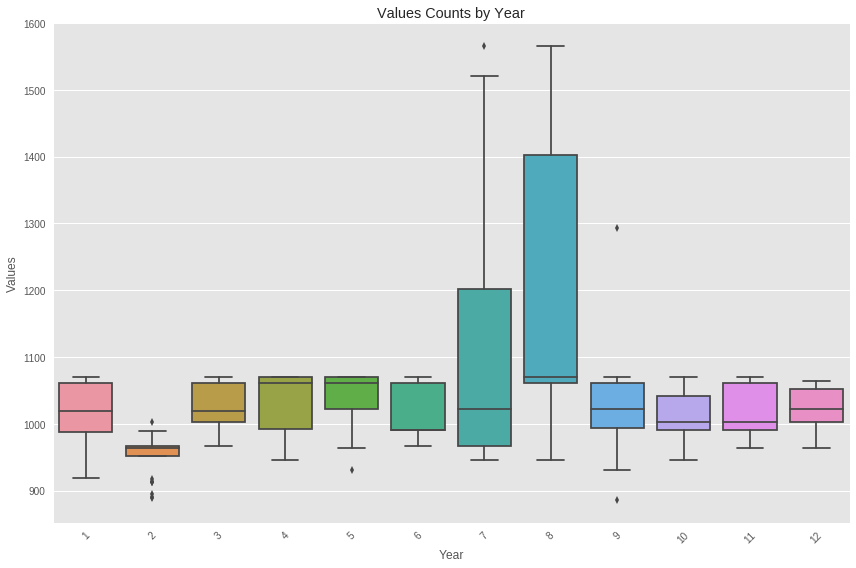

In [144]:
plt.figure(figsize=(12,8),  facecolor='white')
 
sns.boxplot(x='thang', y='8', data=ck)
plt.xticks(rotation=45)
plt.title('Values Counts by Year')
plt.xlabel('Year')
plt.ylabel('Values')
plt.tight_layout()
plt.show() 

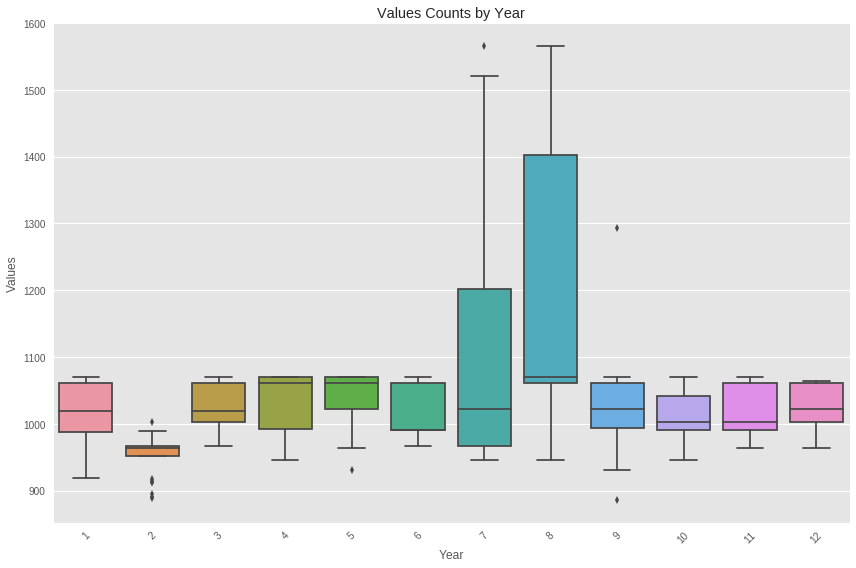

In [145]:
plt.figure(figsize=(12,8),  facecolor='white')
 
sns.boxplot(x='thang', y='9', data=ck)
plt.xticks(rotation=45)
plt.title('Values Counts by Year')
plt.xlabel('Year')
plt.ylabel('Values')
plt.tight_layout()
plt.show() 

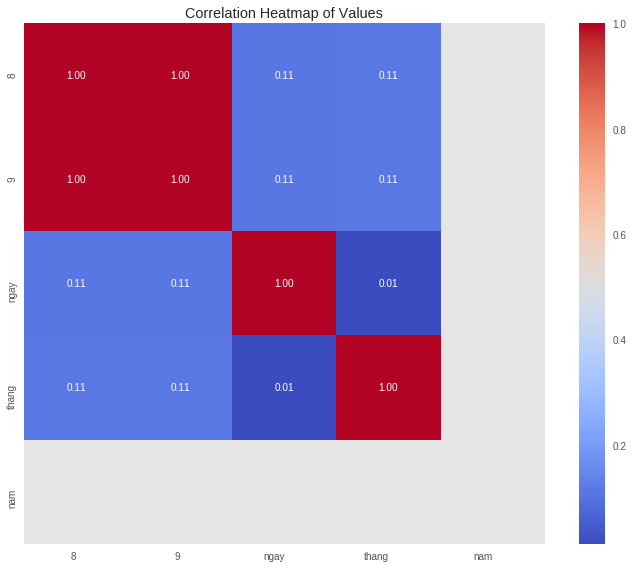

In [146]:
# Calculate the correlation matrix
corr = ck.corr()

# Generate a heatmap
plt.figure(figsize=(10,8), facecolor='white')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Values')
plt.xticks( ha='right')
plt.yticks()
plt.tight_layout()
plt.show()

Text(0.5,1,'Trung bình giá trị mỗi tháng')

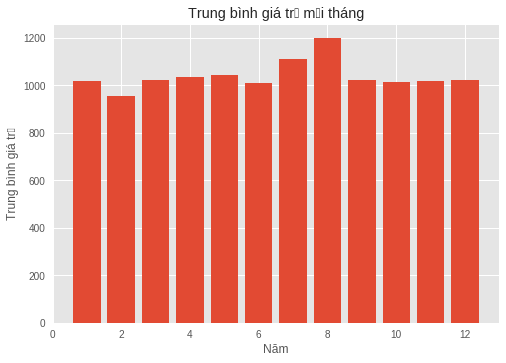

In [147]:

ck_mean = ck.groupby("thang")["8"].mean()# Vẽ biểu đồ cột
plt.bar(ck_mean.index, ck_mean)
plt.xlabel("Năm")
plt.ylabel("Trung bình giá trị")
plt.title("Trung bình giá trị mỗi tháng")

Text(0.5,1,'Trung bình giá trị mỗi tháng')

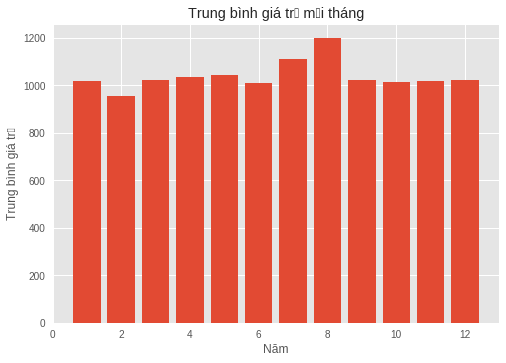

In [148]:
ck_mean = ck.groupby("thang")["9"].mean()# Vẽ biểu đồ cột
plt.bar(ck_mean.index, ck_mean)
plt.xlabel("Năm")
plt.ylabel("Trung bình giá trị")
plt.title("Trung bình giá trị mỗi tháng")

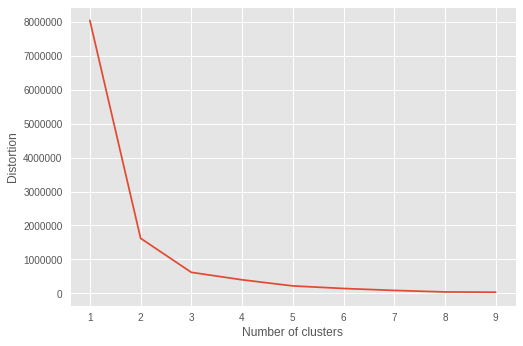

In [149]:
ck_new = ck.iloc[:,[1,2]]
wcss = [] 
for i in range(1,10): 
     kmeans = KMeans(n_clusters = i )
     kmeans.fit(ck_new.values.reshape(-1,1)) 
     wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion') 
plt.show()

choose k = 5

In [150]:
kmeans = KMeans(n_clusters = 5 )
kmeans.fit(ck_new.values.reshape(-1,1))
test_labels = kmeans.predict(ck_new.values.reshape(-1,1))
print(test_labels)

[0 0 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 0 0 3 3 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2
 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3
 3 3 3 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3
 2 2 2 2 2 2 2 2 2 2 0 0 3 3 3 3 3 3 2 2 2 2 2 2 0 0 3 3 2 2 3 3 3 3 3 3 3
 3 0 0 3 3 2 2 2 2 2 2 3 3 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 2 2 2 2 2 3 3 3 3 3 3 0 0 3
 3 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 3 3 3 3 2 2 3 3 3 3 3 3 3 3 0 0 0 0 3 3 2 2 2 2 2 2 2 2 3 3 3 3 3 3 0 0 3
 3 3 3 2 2 2 2 3 3 0 0 3 3 3 3 2 2 2 2 2 2 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0
 3 3 2 2 0 0 3 3 3 3 3 3 0 0 0 0 3 3 3 3 2 2 2 2 2 2 0 0 2 2 1 1 4 4 1 1 4
 4 1 1 2 2 1 1 1 1 1 1 2 2 3 3 0 0 0 0 3 3 2 2 2 2 2 2 2 2 2 2 3 3 2 2 1 1
 1 1 1 1 1 1 1 1 1 1 4 4 4 4 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1 2 2 2 2 3 3 0
 0 3 3 3 3 3 3 0 0 3 3 2 

In [151]:
gmm = GaussianMixture(n_components = 5) 
gmm.fit(ck_new.values.reshape(-1,1)) 
test_labels = gmm.predict(ck_new.values.reshape(-1,1))
print(test_labels)

[0 0 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 0 0 4 4 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2
 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4
 4 4 4 4 4 0 0 4 4 4 4 4 4 4 4 4 4 4 4 0 0 4 4 4 4 4 4 2 2 4 4 4 4 4 4 4 4
 2 2 2 2 2 2 2 2 2 2 0 0 4 4 4 4 4 4 2 2 2 2 2 2 0 0 4 4 2 2 4 4 4 4 4 4 4
 4 0 0 4 4 2 2 2 2 2 2 4 4 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 2 2
 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 2 2 2 2 2 4 4 4 4 4 4 0 0 4
 4 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 4 4 4 4 2 2 4 4 4 4 4 4 4 4 0 0 0 0 4 4 2 2 2 2 2 2 2 2 4 4 4 4 4 4 0 0 4
 4 4 4 2 2 2 2 4 4 0 0 4 4 4 4 2 2 2 2 2 2 0 0 0 0 0 0 4 4 0 0 0 0 0 0 0 0
 4 4 2 2 0 0 4 4 4 4 4 4 0 0 0 0 4 4 4 4 2 2 2 2 2 2 0 0 2 2 3 3 1 1 3 3 1
 1 3 3 0 0 3 3 3 3 3 3 2 2 4 4 0 0 0 0 4 4 2 2 2 2 2 2 2 2 2 2 4 4 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 1 1 1 1 3 3 3 3 3 3 3 3 2 2 2 2 3 3 3 3 2 2 2 2 4 4 0
 0 4 4 4 4 4 4 0 0 4 4 2 

In [ ]:
# ARIMA LİBRARY
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit(disp=0)

# predict
start_index = datetime(1944, 6, 25)
end_index = datetime(1945, 5, 31)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

* lets predict and visualize all path and find mean squared error

In [ ]:
# predict all path
from sklearn.metrics import mean_squared_error
# fit model
model2 = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit(disp=0)
forecast2 = model_fit2.predict()
error = mean_squared_error(ts, forecast2)
print("error: " ,error)
# visualization
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.savefig('graph.png')

plt.show()

<a id="10"></a> <br>
# Conclusion
* In this tutorial, I want ot make tutorial about ARIMA and make some visualization before it.
* We learn how to make map plots with pyplot. 
* We learn how to make time series forecast.
* **If you have any question advise or feedback, I will be very happy to hear it**